# AN AUTOMATED SYSTEM FOR WASTE CLSSIFICATION

Introduction 💠

This project builds a CNN to classify waste into 🍂 Organic and ♻️ Recyclable categories, with data preprocessing, model training, evaluation, and real-time predictions.

Importing all necessary libraries: TensorFlow/Keras for building CNN, Matplotlib/Seaborn for visualization, sklearn for evaluation, and Colab utilities for file handling.

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os

Mount Google Drive to access dataset files stored in Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Define the file paths for training and testing datasets.

In [4]:
train_dir='/content/drive/MyDrive/Project_on_CNN/archive (1)/DATASET/TRAIN'
test_dir='/content/drive/MyDrive/Project_on_CNN/archive (1)/DATASET/TEST'

Data preprocessing and augmentation: Rescale pixel values and apply transformations (shear, zoom, flip) to improve generalization. Create train/test generators for feeding data into CNN.

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 8007 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Visualize sample images from the training set

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


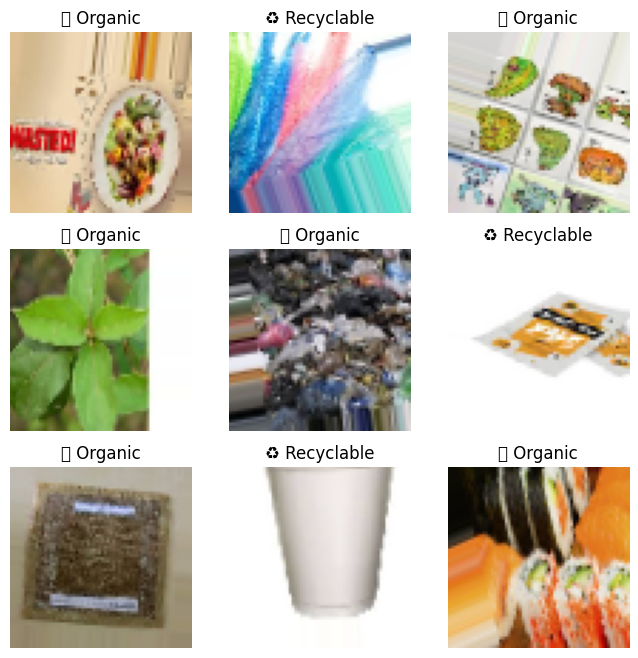

In [18]:
images, labels = next(train_generator)   # get one batch of images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title("♻️ Recyclable" if labels[i] == 1 else "🍂 Organic")
    plt.axis("off")
plt.show()

Define CNN model architecture: Convolution + Pooling layers for feature extraction, BatchNormalization for stability, Dense layers for classification, Dropout to reduce overfitting, and final sigmoid output for binary classification.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Step 4: Build CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

 Show model summary with layers and parameters

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,665 (6.20 MB)

 Trainable params: 1,625,473 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

 Compile the CNN with Adam optimizer and binary cross-entropy loss

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the CNN model for 15 epochs using training data, and validate with test data.

In [22]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=test_generator)

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2464s 10s/step - accuracy: 0.7088 - loss: 1.4560 - val_accuracy: 0.5000 - val_loss: 1.1623
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 100s 397ms/step - accuracy: 0.7693 - loss: 0.6953 - val_accuracy: 0.7910 - val_loss: 0.4807
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 100s 400ms/step - accuracy: 0.7995 - loss: 0.4823 - val_accuracy: 0.8300 - val_loss: 0.4775
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 404ms/step - accuracy: 0.7994 - loss: 0.4565 - val_accuracy: 0.8650 - val_loss: 0.3792
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.8212 - loss: 0.4125 - val_accuracy: 0.8630 - val_loss: 0.3519
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 100s 397ms/step - accuracy: 0.8228 - loss: 0.4199 - val_accuracy: 0.8625 - val_loss: 0.4594
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 402ms/step - accuracy: 0.8214 - loss: 0.4104 - val_accuracy: 0.8450 - val_loss: 0.5547
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.8375 - lo

 Save the trained model for future use

In [23]:
model.save('/content/drive/MyDrive/Project_on_CNN/waste_classifier_model.h5')

Plot training vs validation accuracy and loss curves

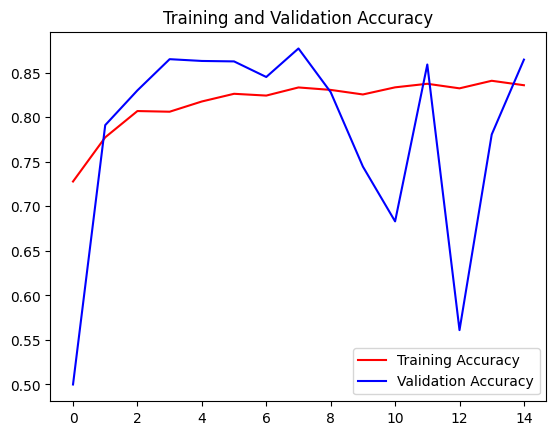

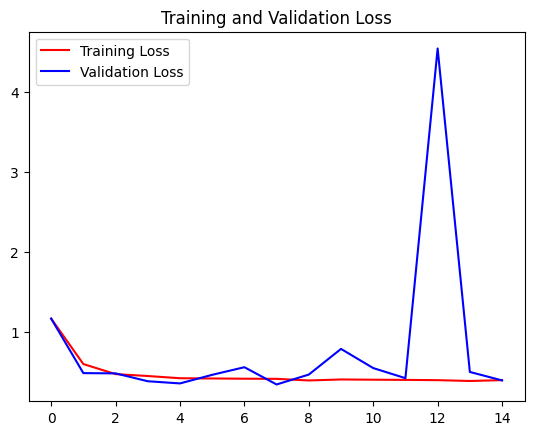

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Generate confusion matrix and classification report for model evaluation

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step


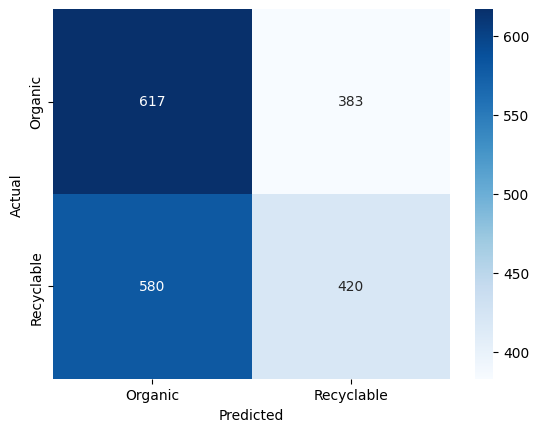

              precision    recall  f1-score   support

     Organic       0.52      0.62      0.56      1000
  Recyclable       0.52      0.42      0.47      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.52      0.52      0.51      2000



In [25]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").ravel()

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Organic", "Recyclable"], yticklabels=["Organic", "Recyclable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=["Organic", "Recyclable"]))

In [26]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.8570 - loss: 0.4138
Test Accuracy: 86.45%


This defines a prediction function to classify uploaded images as ♻️ Recyclable or 🍂 Organic waste using the trained CNN model.

In [27]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print("♻️ Recyclable Waste")
    else:
        print("🍂 Organic Waste")

# Upload and predict images
uploaded = files.upload()
for fn in uploaded.keys():
    predict_image(fn)

Saving organic mango.jpg to organic mango.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
🍂 Organic Waste
